## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 0.9432840	total: 48.5ms	remaining: 48.4s
1:	learn: 0.9239628	total: 49.8ms	remaining: 24.8s
2:	learn: 0.9042229	total: 51ms	remaining: 17s
3:	learn: 0.8871516	total: 52ms	remaining: 12.9s
4:	learn: 0.8714908	total: 53.1ms	remaining: 10.6s
5:	learn: 0.8547821	total: 54.1ms	remaining: 8.97s
6:	learn: 0.8382985	total: 55.2ms	remaining: 7.83s
7:	learn: 0.8218871	total: 56.2ms	remaining: 6.96s
8:	learn: 0.8057569	total: 57.2ms	remaining: 6.3s
9:	learn: 0.7903115	total: 58.3ms	remaining: 5.77s
10:	learn: 0.7773550	total: 59.4ms	remaining: 5.34s
11:	learn: 0.7625109	total: 60.4ms	remaining: 4.97s
12:	learn: 0.7474061	total: 61.5ms	remaining: 4.67s
13:	learn: 0.7322896	total: 62.6ms	remaining: 4.41s
14:	learn: 0.7200589	total: 63.6ms	remaining: 4.18s
15:	learn: 0.7062094	total: 64.6ms	remaining: 3.98s
16:	learn: 0.6948857	total: 65.8ms	remaining: 3.8s
17:	learn: 0.6831055	total: 66.8ms	remaining: 3.64s
18:	learn: 0.6718417	total: 67.7ms	remaining: 3.5s
19:	learn: 0.6598023	total: 68.

131:	learn: 0.2556190	total: 184ms	remaining: 1.21s
132:	learn: 0.2546086	total: 185ms	remaining: 1.21s
133:	learn: 0.2535919	total: 186ms	remaining: 1.2s
134:	learn: 0.2522635	total: 187ms	remaining: 1.2s
135:	learn: 0.2512602	total: 188ms	remaining: 1.2s
136:	learn: 0.2500246	total: 190ms	remaining: 1.19s
137:	learn: 0.2489733	total: 191ms	remaining: 1.19s
138:	learn: 0.2480039	total: 192ms	remaining: 1.19s
139:	learn: 0.2472289	total: 193ms	remaining: 1.18s
140:	learn: 0.2463035	total: 194ms	remaining: 1.18s
141:	learn: 0.2456649	total: 195ms	remaining: 1.18s
142:	learn: 0.2446683	total: 196ms	remaining: 1.17s
143:	learn: 0.2439650	total: 197ms	remaining: 1.17s
144:	learn: 0.2432336	total: 198ms	remaining: 1.17s
145:	learn: 0.2425144	total: 199ms	remaining: 1.16s
146:	learn: 0.2416984	total: 200ms	remaining: 1.16s
147:	learn: 0.2404286	total: 201ms	remaining: 1.16s
148:	learn: 0.2393522	total: 202ms	remaining: 1.15s
149:	learn: 0.2384382	total: 203ms	remaining: 1.15s
150:	learn: 0.2

259:	learn: 0.1735014	total: 317ms	remaining: 902ms
260:	learn: 0.1728875	total: 318ms	remaining: 901ms
261:	learn: 0.1722988	total: 319ms	remaining: 899ms
262:	learn: 0.1716848	total: 320ms	remaining: 898ms
263:	learn: 0.1712554	total: 321ms	remaining: 896ms
264:	learn: 0.1708416	total: 322ms	remaining: 894ms
265:	learn: 0.1706103	total: 323ms	remaining: 892ms
266:	learn: 0.1703400	total: 324ms	remaining: 890ms
267:	learn: 0.1697195	total: 325ms	remaining: 889ms
268:	learn: 0.1692882	total: 326ms	remaining: 887ms
269:	learn: 0.1690226	total: 327ms	remaining: 885ms
270:	learn: 0.1686552	total: 328ms	remaining: 884ms
271:	learn: 0.1681296	total: 330ms	remaining: 882ms
272:	learn: 0.1676136	total: 331ms	remaining: 880ms
273:	learn: 0.1670476	total: 332ms	remaining: 879ms
274:	learn: 0.1667605	total: 333ms	remaining: 877ms
275:	learn: 0.1663415	total: 334ms	remaining: 876ms
276:	learn: 0.1658370	total: 335ms	remaining: 874ms
277:	learn: 0.1653691	total: 336ms	remaining: 872ms
278:	learn: 

390:	learn: 0.1276489	total: 450ms	remaining: 700ms
391:	learn: 0.1273644	total: 451ms	remaining: 699ms
392:	learn: 0.1270690	total: 452ms	remaining: 698ms
393:	learn: 0.1266838	total: 453ms	remaining: 697ms
394:	learn: 0.1263099	total: 454ms	remaining: 695ms
395:	learn: 0.1260736	total: 455ms	remaining: 694ms
396:	learn: 0.1258695	total: 456ms	remaining: 693ms
397:	learn: 0.1254725	total: 457ms	remaining: 691ms
398:	learn: 0.1251068	total: 458ms	remaining: 690ms
399:	learn: 0.1247713	total: 459ms	remaining: 688ms
400:	learn: 0.1244341	total: 460ms	remaining: 687ms
401:	learn: 0.1241675	total: 461ms	remaining: 686ms
402:	learn: 0.1239431	total: 462ms	remaining: 684ms
403:	learn: 0.1238184	total: 463ms	remaining: 683ms
404:	learn: 0.1235508	total: 464ms	remaining: 682ms
405:	learn: 0.1231516	total: 465ms	remaining: 680ms
406:	learn: 0.1229278	total: 466ms	remaining: 679ms
407:	learn: 0.1226192	total: 467ms	remaining: 677ms
408:	learn: 0.1224432	total: 468ms	remaining: 676ms
409:	learn: 

521:	learn: 0.0986649	total: 583ms	remaining: 534ms
522:	learn: 0.0985646	total: 584ms	remaining: 533ms
523:	learn: 0.0984258	total: 585ms	remaining: 532ms
524:	learn: 0.0981937	total: 586ms	remaining: 531ms
525:	learn: 0.0979291	total: 587ms	remaining: 529ms
526:	learn: 0.0977895	total: 589ms	remaining: 528ms
527:	learn: 0.0976800	total: 590ms	remaining: 527ms
528:	learn: 0.0974457	total: 591ms	remaining: 526ms
529:	learn: 0.0971569	total: 592ms	remaining: 525ms
530:	learn: 0.0970022	total: 593ms	remaining: 524ms
531:	learn: 0.0967384	total: 594ms	remaining: 522ms
532:	learn: 0.0965668	total: 595ms	remaining: 521ms
533:	learn: 0.0963791	total: 596ms	remaining: 520ms
534:	learn: 0.0961488	total: 597ms	remaining: 519ms
535:	learn: 0.0960468	total: 598ms	remaining: 518ms
536:	learn: 0.0958634	total: 599ms	remaining: 516ms
537:	learn: 0.0956944	total: 600ms	remaining: 515ms
538:	learn: 0.0955551	total: 601ms	remaining: 514ms
539:	learn: 0.0953057	total: 602ms	remaining: 513ms
540:	learn: 

650:	learn: 0.0791360	total: 716ms	remaining: 384ms
651:	learn: 0.0789377	total: 718ms	remaining: 383ms
652:	learn: 0.0788340	total: 719ms	remaining: 382ms
653:	learn: 0.0786830	total: 720ms	remaining: 381ms
654:	learn: 0.0786009	total: 721ms	remaining: 380ms
655:	learn: 0.0784260	total: 722ms	remaining: 378ms
656:	learn: 0.0782494	total: 723ms	remaining: 377ms
657:	learn: 0.0781209	total: 724ms	remaining: 376ms
658:	learn: 0.0780379	total: 725ms	remaining: 375ms
659:	learn: 0.0778524	total: 726ms	remaining: 374ms
660:	learn: 0.0776655	total: 727ms	remaining: 373ms
661:	learn: 0.0775209	total: 728ms	remaining: 372ms
662:	learn: 0.0774577	total: 729ms	remaining: 371ms
663:	learn: 0.0773384	total: 730ms	remaining: 369ms
664:	learn: 0.0771968	total: 731ms	remaining: 368ms
665:	learn: 0.0770549	total: 732ms	remaining: 367ms
666:	learn: 0.0768872	total: 733ms	remaining: 366ms
667:	learn: 0.0767569	total: 734ms	remaining: 365ms
668:	learn: 0.0766134	total: 735ms	remaining: 364ms
669:	learn: 

783:	learn: 0.0640967	total: 852ms	remaining: 235ms
784:	learn: 0.0639710	total: 853ms	remaining: 234ms
785:	learn: 0.0638792	total: 854ms	remaining: 232ms
786:	learn: 0.0638057	total: 855ms	remaining: 231ms
787:	learn: 0.0636826	total: 856ms	remaining: 230ms
788:	learn: 0.0635420	total: 857ms	remaining: 229ms
789:	learn: 0.0634467	total: 858ms	remaining: 228ms
790:	learn: 0.0633499	total: 859ms	remaining: 227ms
791:	learn: 0.0632733	total: 860ms	remaining: 226ms
792:	learn: 0.0632263	total: 861ms	remaining: 225ms
793:	learn: 0.0631307	total: 862ms	remaining: 224ms
794:	learn: 0.0630174	total: 863ms	remaining: 222ms
795:	learn: 0.0628985	total: 864ms	remaining: 221ms
796:	learn: 0.0628287	total: 865ms	remaining: 220ms
797:	learn: 0.0627024	total: 866ms	remaining: 219ms
798:	learn: 0.0626067	total: 867ms	remaining: 218ms
799:	learn: 0.0624442	total: 868ms	remaining: 217ms
800:	learn: 0.0623466	total: 869ms	remaining: 216ms
801:	learn: 0.0622643	total: 870ms	remaining: 215ms
802:	learn: 

912:	learn: 0.0527591	total: 986ms	remaining: 93.9ms
913:	learn: 0.0526870	total: 987ms	remaining: 92.9ms
914:	learn: 0.0525965	total: 988ms	remaining: 91.8ms
915:	learn: 0.0524748	total: 989ms	remaining: 90.7ms
916:	learn: 0.0524516	total: 990ms	remaining: 89.6ms
917:	learn: 0.0524434	total: 991ms	remaining: 88.5ms
918:	learn: 0.0523406	total: 992ms	remaining: 87.5ms
919:	learn: 0.0523110	total: 994ms	remaining: 86.4ms
920:	learn: 0.0522700	total: 995ms	remaining: 85.3ms
921:	learn: 0.0521724	total: 996ms	remaining: 84.2ms
922:	learn: 0.0521375	total: 997ms	remaining: 83.2ms
923:	learn: 0.0520342	total: 998ms	remaining: 82.1ms
924:	learn: 0.0519592	total: 999ms	remaining: 81ms
925:	learn: 0.0519083	total: 1s	remaining: 79.9ms
926:	learn: 0.0518445	total: 1s	remaining: 78.8ms
927:	learn: 0.0517601	total: 1s	remaining: 77.8ms
928:	learn: 0.0517037	total: 1s	remaining: 76.7ms
929:	learn: 0.0516492	total: 1s	remaining: 75.6ms
930:	learn: 0.0516138	total: 1s	remaining: 74.5ms
931:	learn: 0

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

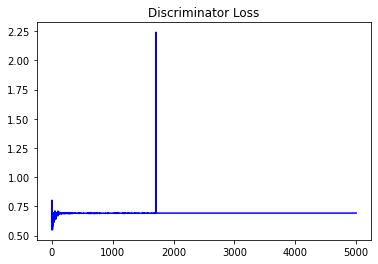

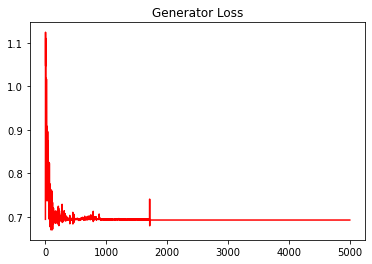

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

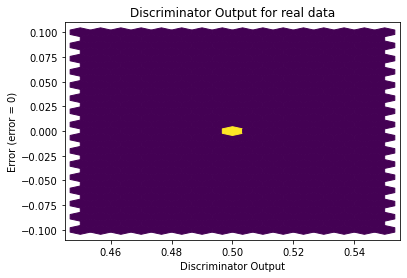

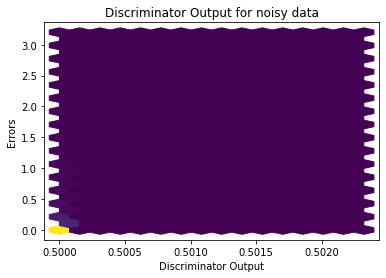

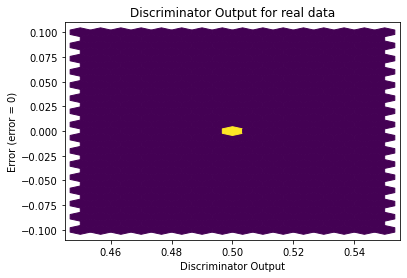

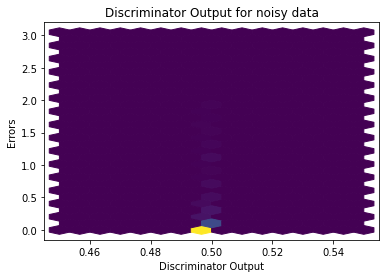

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


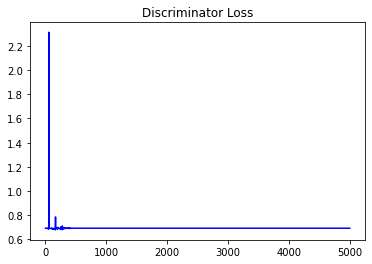

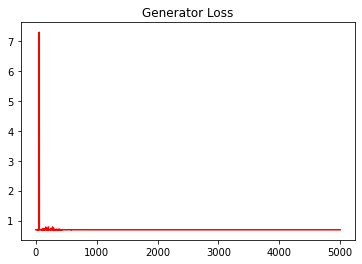

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

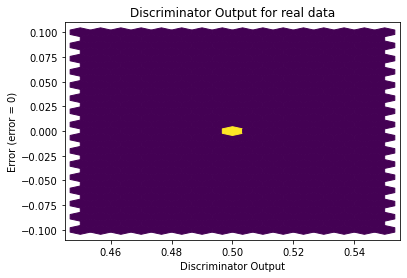

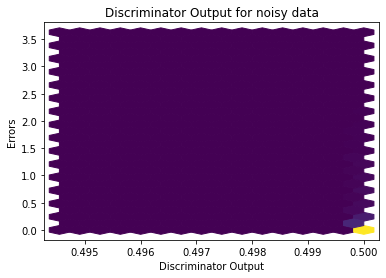

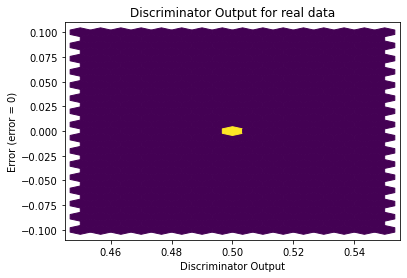

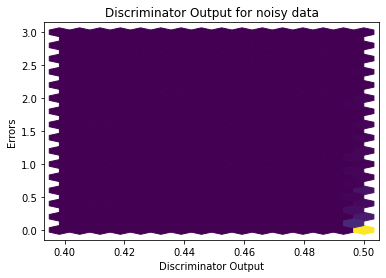

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0098]], device='cuda:0', requires_grad=True)
